In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('flats_cleaned_v3.csv')

In [4]:
df.duplicated().sum()

1

In [5]:
df = pd.read_csv('flats_cleaned_v3.csv').drop_duplicates()

In [6]:
df.head()

,society,price,place,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,simoco sanhita housing complex,0.27,bhangar,3857.0,Super Built up area 916(85.1 sq.m.)Carpet area...,3.0,2,1,2,NaN,New Property,West,916.0,NaN,700.0,0,0,0,0,0,0,100.0
1,team taurus kabya,0.52,rajarhat,3729.0,Super Built up area 1287(119.57 sq.m.),3.0,2,2,2,NaN,New Property,East,1287.0,NaN,NaN,0,0,0,0,0,0,43.0
2,baisnabghata,0.35,garia,4320.0,Carpet area: 810 (75.25 sq.m.),2.0,2,3+,3,North-East,Old Property,South,NaN,NaN,810.0,0,0,0,0,0,2,40.0
3,lake gardens chs,0.50,lake gardens,6045.0,Carpet area: 827 (76.83 sq.m.),2.0,2,0,0,South-East,Old Property,South,NaN,NaN,827.0,0,0,0,0,0,0,8.0
4,lalit bhawan,0.10,santragachi,2777.0,Carpet area: 360 (33.45 sq.m.),1.0,1,0,0,East,Relatively New,West,NaN,NaN,360.0,0,0,0,0,0,2,13.0


There could be two senarios.

*   data is normally distributed ->  **+/- 3 sigma**
*   data is not normally distributed ->   **box plot**



In [7]:
df.shape

(1424, 22)

In [8]:
df.columns

Index(['society', 'price', 'place', 'price_per_sqft', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing', 'agePossession',
       'Direction', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

<ipython-input-9-ea43129b75a2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

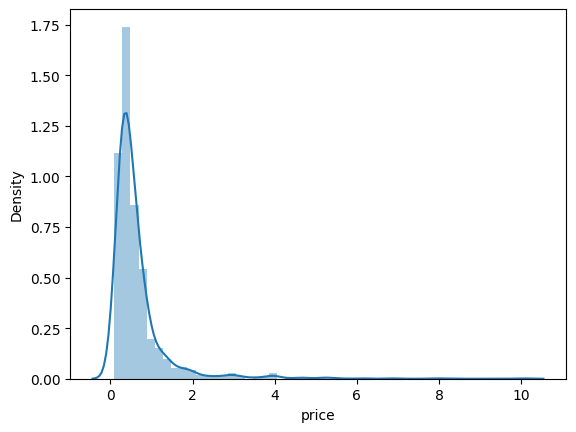

In [9]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

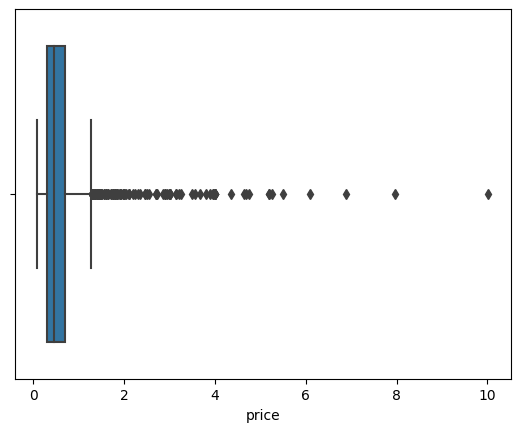

In [10]:
sns.boxplot(x=df['price'])

In [11]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(121,
 count    121.000000
 mean       2.496446
 std        1.455884
 min        1.300000
 25%        1.500000
 50%        1.900000
 75%        3.000000
 max       10.020000
 Name: price, dtype: float64)

In [12]:
outliers.sort_values('price',ascending=False).head(10)

,society,price,place,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,forum footprints,10.02,ballygunge,34104.0,Carpet area: 2938 (272.95 sq.m.),4.0,4,2,3,NaN,New Property,South,NaN,NaN,2938.0,0,0,0,0,0,0,71.0
526,godrej platinum,7.97,alipore,16094.0,Super Built up area 4955(460.33 sq.m.),4.0,5,2,8,South,Relatively New,South,4955.0,NaN,NaN,0,1,0,0,0,0,54.0
279,on request,6.88,rowland row,21014.0,Super Built up area 3274(304.16 sq.m.),4.0,4,1,4,South,Moderately Old,South,3274.0,NaN,NaN,0,1,0,0,0,0,54.0
524,arihant cavetto,6.10,jodhpur park,13689.0,Super Built up area 4456(413.98 sq.m.),5.0,4,1,3,South,Relatively New,South,4456.0,NaN,NaN,0,1,0,0,0,0,54.0
1264,pragjyoti,5.49,barisha,18300.0,Carpet area: 3000 (278.71 sq.m.),4.0,4,0,4,NaN,Undefined,North,NaN,NaN,3000.0,0,0,0,0,0,0,0.0
1184,ideal gardens,5.25,mandevilla garden,23659.0,Carpet area: 2219 (206.15 sq.m.),3.0,4,1,1,NaN,Old Property,South,NaN,NaN,2219.0,0,1,0,1,0,0,0.0
215,kundalia tower,5.20,theatre road,20392.0,Super Built up area 2550(236.9 sq.m.),4.0,4,2,2,NaN,Moderately Old,Central,2550.0,NaN,NaN,0,0,0,0,0,0,0.0
160,kundalia towers,5.20,theatre road,20392.0,Carpet area: 2550 (236.9 sq.m.),3.0,4,2,2,NaN,Moderately Old,Central,NaN,NaN,2550.0,0,0,0,0,0,0,5.0
296,on request,4.75,alipore,13194.0,Super Built up area 3600(334.45 sq.m.),4.0,5,1,7,South,Relatively New,South,3600.0,NaN,NaN,0,1,0,0,0,0,54.0
527,on request new alipore,4.69,alipore,13500.0,Super Built up area 3474(322.75 sq.m.),4.0,4,2,2,South,Relatively New,South,3474.0,NaN,NaN,0,0,0,0,1,0,35.0


In [13]:
# on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

# Price_per_sqft

<ipython-input-14-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

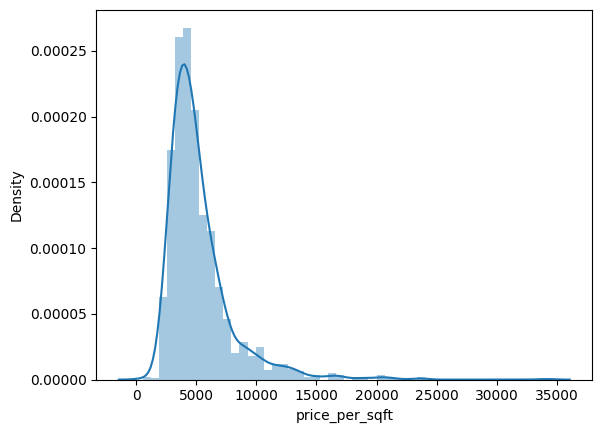

In [14]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

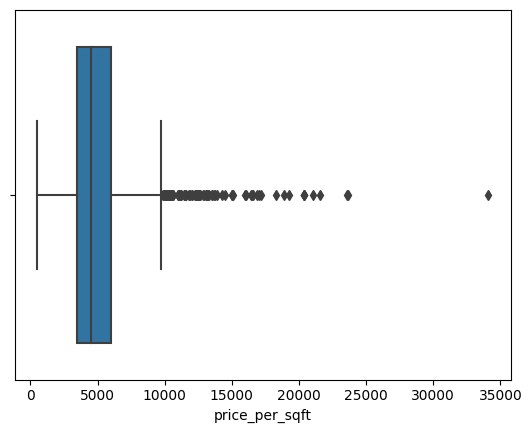

In [15]:
sns.boxplot(x=df['price_per_sqft'])

In [16]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(93,
 count       93.000000
 mean     13342.247312
 std       3954.982443
 min       9840.000000
 25%      10555.000000
 50%      12232.000000
 75%      14239.000000
 max      34104.000000
 Name: price_per_sqft, dtype: float64)

In [17]:
#checking 'price_per_sqft' column where values are more than 23000.
df[df['price_per_sqft'] > 18000]

,society,price,place,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,forum footprints,10.02,ballygunge,34104.0,Carpet area: 2938 (272.95 sq.m.),4.0,4,2,3,NaN,New Property,South,NaN,NaN,2938.0,0,0,0,0,0,0,71.0
16,mani vista,2.72,tollygunge,21570.0,Super Built up area 1925(178.84 sq.m.)Built Up...,3.0,3,1,28,NaN,New Property,South,1925.0,1432.0,1261.0,0,1,0,0,0,0,35.0
160,kundalia towers,5.20,theatre road,20392.0,Carpet area: 2550 (236.9 sq.m.),3.0,4,2,2,NaN,Moderately Old,Central,NaN,NaN,2550.0,0,0,0,0,0,0,5.0
176,fort oasis,2.50,ballygunge,19230.0,Super Built up area 1588(147.53 sq.m.)Carpet a...,3.0,2,1,5,South-East,Moderately Old,South,1588.0,NaN,1300.0,0,0,0,0,0,1,139.0
215,kundalia tower,5.20,theatre road,20392.0,Super Built up area 2550(236.9 sq.m.),4.0,4,2,2,NaN,Moderately Old,Central,2550.0,NaN,NaN,0,0,0,0,0,0,0.0
279,on request,6.88,rowland row,21014.0,Super Built up area 3274(304.16 sq.m.),4.0,4,1,4,South,Moderately Old,South,3274.0,NaN,NaN,0,1,0,0,0,0,54.0
509,anik one rajarhat,1.40,new town,18918.0,Super Built up area 1244(115.57 sq.m.)Built Up...,2.0,2,2,12,North-West,Relatively New,East,1244.0,908.0,740.0,0,0,0,0,0,0,172.0
982,victoria vistas,3.15,bhawanipore,23559.0,Super Built up area 2323(215.81 sq.m.)Carpet a...,3.0,3,1,7,South-West,Relatively New,South,2323.0,NaN,1337.0,0,1,0,0,0,0,48.0
1111,ps jiva,1.75,ch,20372.0,Carpet area: 859 (79.8 sq.m.),3.0,3,1,11,North-West,Relatively New,East,NaN,NaN,859.0,0,0,0,0,1,0,136.0
1184,ideal gardens,5.25,mandevilla garden,23659.0,Carpet area: 2219 (206.15 sq.m.),3.0,4,1,1,NaN,Old Property,South,NaN,NaN,2219.0,0,1,0,1,0,0,0.0


In [18]:
#after checking, now replacing the original dataframe by removing some rows
df.drop(index=[10, 160, 215, 1184,1264], inplace=True)

<Axes: xlabel='price_per_sqft'>

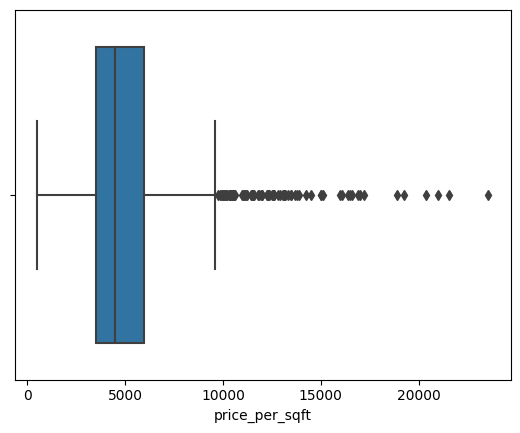

In [19]:
sns.boxplot(x=df['price_per_sqft'])

# bedRoom

<ipython-input-20-926418d7e639>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

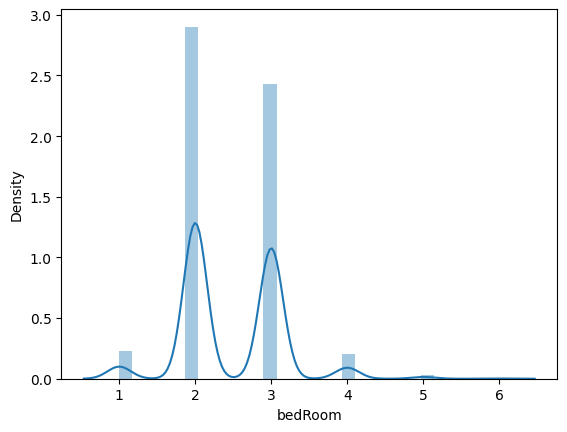

In [20]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

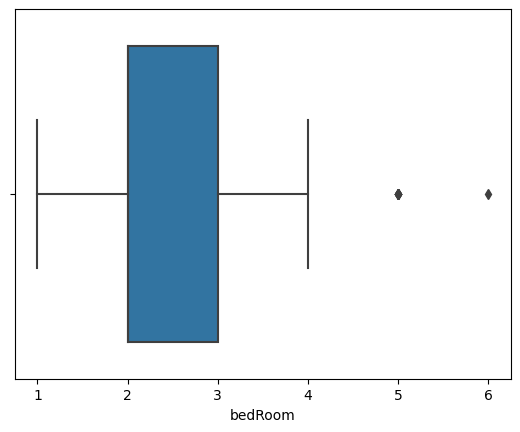

In [21]:
sns.boxplot(x=df['bedRoom'])

In [22]:
df[df['bedRoom'] > 4].sort_values('bedRoom',ascending=False)

,society,price,place,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
549,atree,1.15,new town,4600.0,Super Built up area 2500(232.26 sq.m.),6.0,4,2,4,South,Relatively New,East,2500.0,NaN,NaN,0,0,0,0,1,0,7.0
52,merlin woodlands high,4.65,alipore,11923.0,Built Up area: 3900 (362.32 sq.m.),5.0,6,0,2,North,Old Property,South,NaN,3900.0,NaN,0,0,1,1,0,2,67.0
68,swarnabhoomi,0.79,santragachi,3115.0,Super Built up area 2520(234.12 sq.m.)Carpet a...,5.0,4,2,2,NaN,New Property,West,2520.0,NaN,1800.0,0,0,0,0,0,0,22.0
82,k.n.c road nayan kanan,0.75,barasat,6818.0,Built Up area: 1302 (120.96 sq.m.)Carpet area:...,5.0,3,1,2,South-West,Old Property,North,NaN,1302.0,1100.0,0,0,0,0,0,0,106.0
196,sk tower rabindrapalli,0.90,krishnapur,4000.0,Carpet area: 2250 (209.03 sq.m.),5.0,3,3,5,NaN,Relatively New,North,NaN,NaN,2250.0,1,1,0,0,0,1,0.0
291,on request new alipore,3.68,alipore,10514.0,Super Built up area 3500(325.16 sq.m.),5.0,5,2,4,South,Relatively New,South,3500.0,NaN,NaN,0,0,0,0,1,0,54.0
299,on request,2.70,alipore,7714.0,Super Built up area 3500(325.16 sq.m.),5.0,5,3+,9,South,Moderately Old,South,3500.0,NaN,NaN,0,1,1,0,0,0,54.0
524,arihant cavetto,6.10,jodhpur park,13689.0,Super Built up area 4456(413.98 sq.m.),5.0,4,1,3,South,Relatively New,South,4456.0,NaN,NaN,0,1,0,0,0,0,54.0
1143,ekta floral,3.80,tangra,12377.0,Super Built up area 3070(285.21 sq.m.),5.0,4,2,1,North-West,Moderately Old,East,3070.0,NaN,NaN,1,0,0,0,0,1,77.0


Although it was looking 5 to 6 bedrooms are outliers, after analyzing the data, we can say that they are not outliers.

# bathroom

<ipython-input-23-6f8990f100b4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

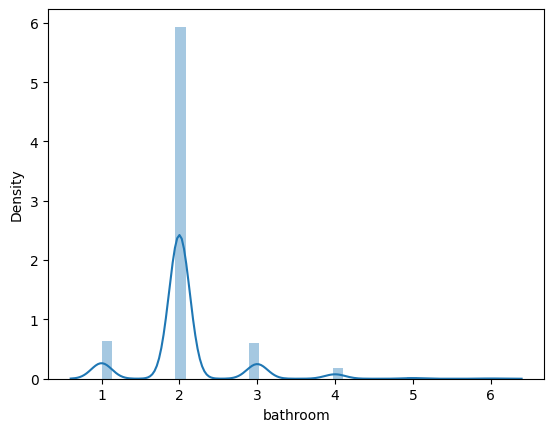

In [23]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

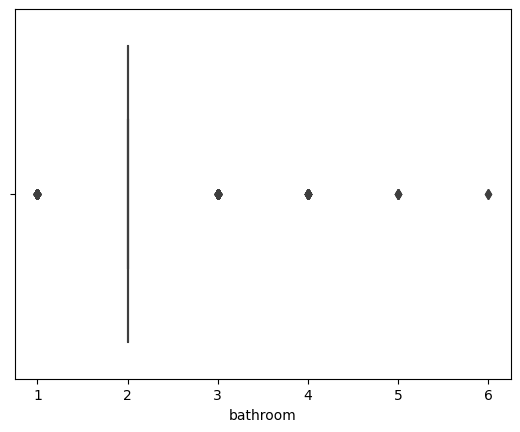

In [24]:
sns.boxplot(x=df['bathroom'])

In [25]:
df[df['bathroom'] > 3].sort_values('bathroom',ascending=False)

,society,price,place,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
52,merlin woodlands high,4.65,alipore,11923.0,Built Up area: 3900 (362.32 sq.m.),5.0,6,0,2,North,Old Property,South,NaN,3900.0,NaN,0,0,1,1,0,2,67.0
187,dlf new town heights,2.10,new town,6578.0,Super Built up area 3192(296.55 sq.m.),4.0,6,2,15,NaN,Relatively New,East,3192.0,NaN,NaN,0,1,0,0,0,2,89.0
296,on request,4.75,alipore,13194.0,Super Built up area 3600(334.45 sq.m.),4.0,5,1,7,South,Relatively New,South,3600.0,NaN,NaN,0,1,0,0,0,0,54.0
299,on request,2.70,alipore,7714.0,Super Built up area 3500(325.16 sq.m.),5.0,5,3+,9,South,Moderately Old,South,3500.0,NaN,NaN,0,1,1,0,0,0,54.0
526,godrej platinum,7.97,alipore,16094.0,Super Built up area 4955(460.33 sq.m.),4.0,5,2,8,South,Relatively New,South,4955.0,NaN,NaN,0,1,0,0,0,0,54.0
291,on request new alipore,3.68,alipore,10514.0,Super Built up area 3500(325.16 sq.m.),5.0,5,2,4,South,Relatively New,South,3500.0,NaN,NaN,0,0,0,0,1,0,54.0
298,on request,4.35,alipore,14500.0,Super Built up area 3000(278.71 sq.m.),4.0,5,2,10,South,Relatively New,South,3000.0,NaN,NaN,0,1,0,0,0,0,54.0
864,elita garden vista,1.15,new town,5882.0,Super Built up area 1955(181.63 sq.m.),3.0,4,2,21,East,Moderately Old,East,1955.0,NaN,NaN,0,1,0,0,1,0,83.0
919,elita garden vista phase 2,1.25,new town,7192.0,Super Built up area 1738(161.47 sq.m.),3.0,4,2,20,South,Relatively New,East,1738.0,NaN,NaN,0,0,0,0,1,2,54.0
922,uttara tritiya,1.50,new town,5769.0,Super Built up area 2600(241.55 sq.m.),4.0,4,3+,6,South-West,Moderately Old,East,2600.0,NaN,NaN,0,1,0,0,0,0,185.0


Here also, it was looking 4 to 6 bathrooms are outliers, after analyzing the data, we can say that they are not outliers.

# super_built_up_area

<ipython-input-26-ce4cb092a62b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

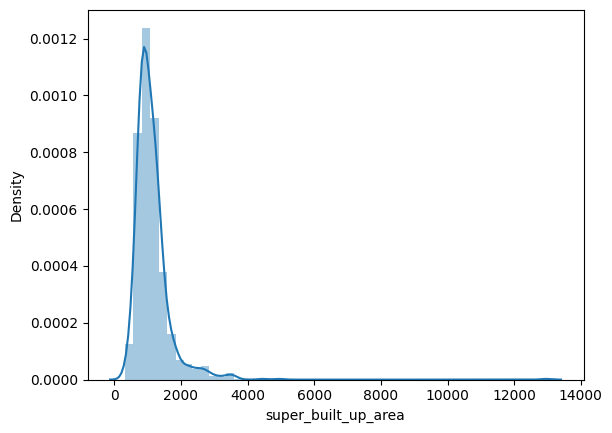

In [26]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

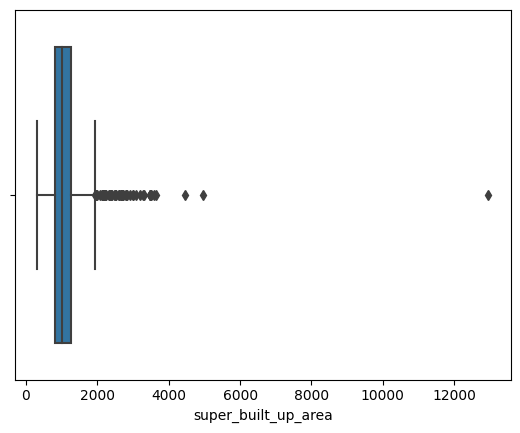

In [27]:
sns.boxplot(x=df['super_built_up_area'])

In [28]:
df[df['super_built_up_area'] > 4000]

,society,price,place,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
289,primarc southwinds,0.68,em bypass,524.0,Super Built up area 12956(1203.65 sq.m.),3.0,2,1,10,NaN,New Property,South,12956.0,NaN,NaN,0,0,0,0,0,0,207.0
524,arihant cavetto,6.10,jodhpur park,13689.0,Super Built up area 4456(413.98 sq.m.),5.0,4,1,3,South,Relatively New,South,4456.0,NaN,NaN,0,1,0,0,0,0,54.0
526,godrej platinum,7.97,alipore,16094.0,Super Built up area 4955(460.33 sq.m.),4.0,5,2,8,South,Relatively New,South,4955.0,NaN,NaN,0,1,0,0,0,0,54.0


In [29]:
df = df[df['super_built_up_area'] <= 4000]

# built_up_area

<ipython-input-30-7e13bd12b627>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

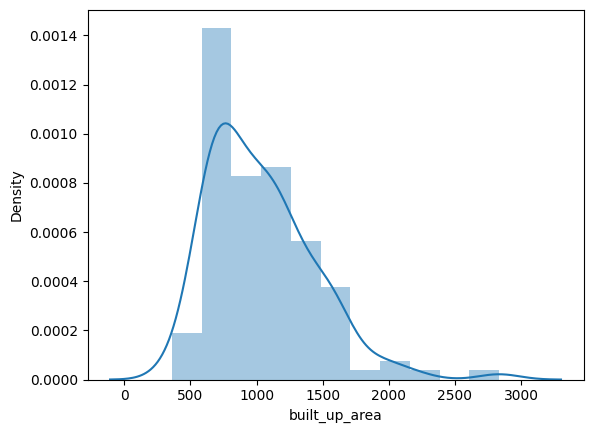

In [30]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

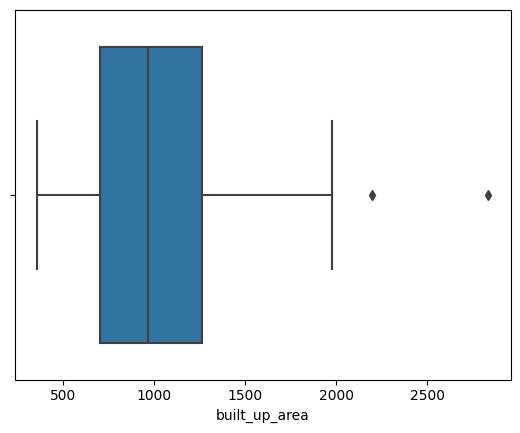

In [31]:
sns.boxplot(x=df['built_up_area'])

In [32]:
df[df['built_up_area'] > 2000]

,society,price,place,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
945,bengal dcl uttara,1.85,new town,6329.0,Super Built up area 2923(271.56 sq.m.)Built Up...,3.0,3,3,6,South-West,Relatively New,East,2923.0,2196.0,2086.0,1,0,0,1,1,0,219.0
1168,ambuja upohar high end society,2.85,garia,7803.0,Super Built up area 3652(339.28 sq.m.)Built Up...,4.0,4,3+,10,South-East,Old Property,South,3652.0,2834.0,2564.0,0,0,0,0,1,0,142.0


# carpet_area

<ipython-input-33-becec57fa840>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

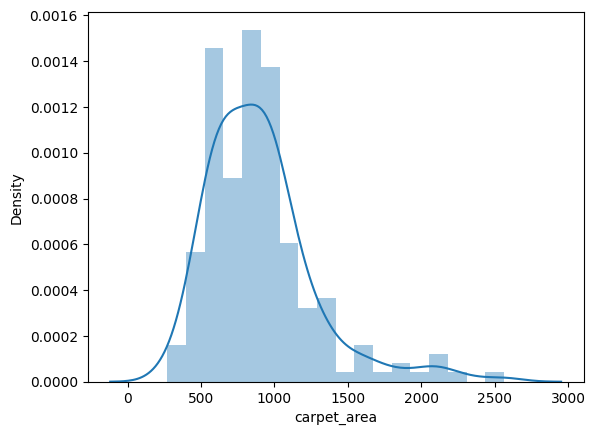

In [33]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

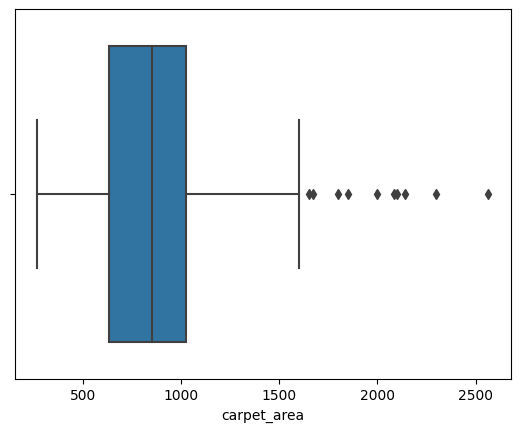

In [34]:
sns.boxplot(x=df['carpet_area'])

In [35]:
df[df['carpet_area'] > 2200]

,society,price,place,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
987,anik one rajarhat,2.95,new town,12826.0,Super Built up area 2380(221.11 sq.m.)Carpet a...,3.0,3,3,9,South-East,Relatively New,East,2380.0,NaN,2300.0,0,1,0,0,0,0,158.0
1168,ambuja upohar high end society,2.85,garia,7803.0,Super Built up area 3652(339.28 sq.m.)Built Up...,4.0,4,3+,10,South-East,Old Property,South,3652.0,2834.0,2564.0,0,0,0,0,1,0,142.0


# luxury_score

<ipython-input-36-bd70b6910aad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

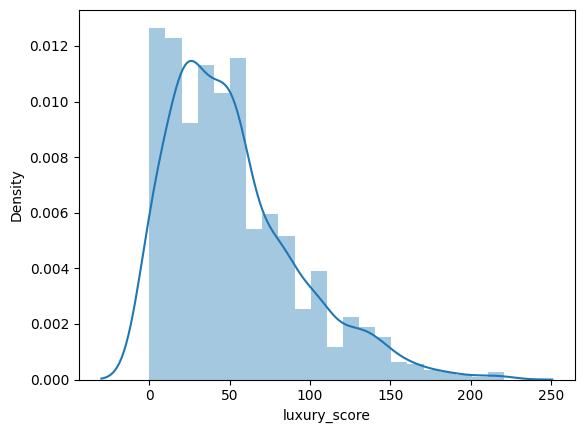

In [36]:
sns.distplot(df['luxury_score'])


<Axes: >

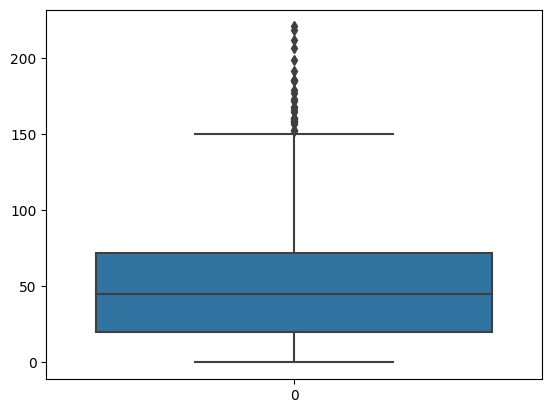

In [37]:
sns.boxplot(df['luxury_score'])

In [38]:
df[df['luxury_score'] > 150].sort_values('luxury_score',ascending=False)

,society,price,place,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Direction,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
508,dlf new town heights,0.72,new town,5727.0,Super Built up area 1257(116.78 sq.m.)Built Up...,2.0,2,1,2,East,Relatively New,East,1257.0,942.00,879.0,0,0,0,0,0,0,221.0
945,bengal dcl uttara,1.85,new town,6329.0,Super Built up area 2923(271.56 sq.m.)Built Up...,3.0,3,3,6,South-West,Relatively New,East,2923.0,2196.00,2086.0,1,0,0,1,1,0,219.0
518,siddha happyville,0.85,rajarhat,6719.0,Super Built up area 1265(117.52 sq.m.)Built Up...,3.0,3,1,2,West,Relatively New,East,1265.0,948.00,902.0,0,0,0,0,0,0,212.0
288,primarc southwinds,0.75,em bypass,5836.0,Super Built up area 1285(119.38 sq.m.),3.0,2,1,7,South-East,Relatively New,South,1285.0,NaN,NaN,0,0,0,0,0,0,207.0
286,primarc southwinds,0.46,em bypass,4661.0,Super Built up area 976(90.67 sq.m.),2.0,2,1,6,South-East,New Property,South,976.0,NaN,NaN,0,0,0,0,0,0,199.0
285,southwinds,0.45,garia,4629.0,Super Built up area 972(90.3 sq.m.),2.0,2,1,6,South-East,New Property,South,972.0,NaN,NaN,0,0,0,0,0,0,192.0
284,primarc southwinds,0.45,em bypass,4610.0,Super Built up area 976(90.67 sq.m.),2.0,2,1,8,South-East,Relatively New,South,976.0,NaN,NaN,0,0,0,0,0,0,186.0
287,primarc southwinds,0.68,em bypass,5250.0,Super Built up area 1295(120.31 sq.m.),3.0,2,1,10,South,New Property,South,1295.0,NaN,NaN,0,0,0,0,0,0,186.0
922,uttara tritiya,1.50,new town,5769.0,Super Built up area 2600(241.55 sq.m.),4.0,4,3+,6,South-West,Moderately Old,East,2600.0,NaN,NaN,0,1,0,0,0,0,185.0
283,southwinds,0.45,garia,4782.0,Super Built up area 941(87.42 sq.m.),2.0,2,1,9,South-East,New Property,South,941.0,NaN,NaN,0,0,0,0,0,0,179.0


Seems like all are OK.

In [39]:
#making new column at location = 4, making price in croces first, then diving with price_per_sqft to get total area
df.insert(loc=4,column='area',value=round((df['price']*10000000)/df['price_per_sqft']))

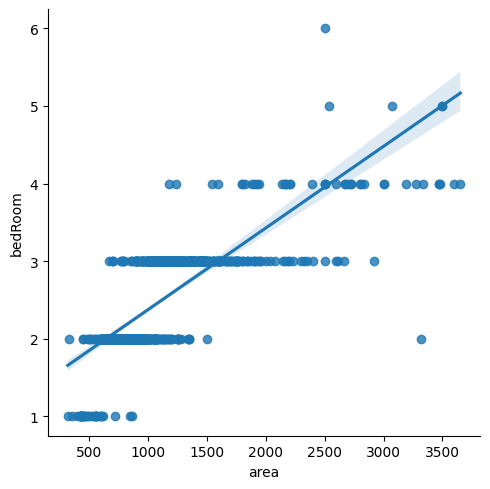

In [40]:
sns.lmplot(data=df, x='area', y='bedRoom')

The above plot is showing a linear trend between Area and Bedroom. So, there is no outliers.

If there were some points who were not following the trends, then inspection was needed.

In [41]:
df.to_csv('flats_cleaned_v4.csv', index=False)

In [43]:
df.shape

(1102, 23)